In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Car price prediction 

Dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/automobile).  
Contains information on car specifications, assigned insurance risk rating (-3 to +3) and normalized relative losses (65 to 256). We will use a KNN model to predict prices.

In [60]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [61]:
columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 	    'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 	        'highway_mpg', 'price']
df.columns = columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

## Missing values

In [62]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [63]:
# Replace "?" by np.nan
df.normalized_losses = df.normalized_losses.replace("?", np.nan).astype('float')

In addition, the following features are all of type object but should be numeric: `"num_cylinders", "bore", "stroke", "horsepower", "peak_rpm"`

In [64]:
numeric = ["num_cylinders", "price", "bore", "stroke", "horsepower", "peak_rpm"]
value_counts = []
df[numeric].apply(lambda col: value_counts.append(col.value_counts()), axis=0)
value_counts

[four      159
 six        24
 five       11
 eight       5
 two         4
 three       1
 twelve      1
 Name: num_cylinders, dtype: int64,
 ?        4
 7609     2
 5572     2
 8495     2
 7775     2
         ..
 13495    1
 11259    1
 35550    1
 6488     1
 8499     1
 Name: price, Length: 187, dtype: int64,
 3.62    23
 3.19    20
 3.15    15
 3.03    12
 2.97    12
 3.46     9
 3.78     8
 3.43     8
 3.31     8
 3.27     7
 2.91     7
 3.05     6
 3.39     6
 3.54     6
 3.58     6
 3.01     5
 3.70     5
 3.35     4
 ?        4
 3.74     3
 3.17     3
 3.59     3
 3.13     2
 3.50     2
 3.94     2
 3.33     2
 3.24     2
 3.63     2
 3.47     2
 3.80     2
 3.76     1
 3.34     1
 3.61     1
 2.92     1
 2.99     1
 3.60     1
 3.08     1
 2.68     1
 2.54     1
 Name: bore, dtype: int64,
 3.40    20
 3.03    14
 3.23    14
 3.15    14
 3.39    13
 2.64    11
 3.29     9
 3.35     9
 3.46     8
 3.58     6
 3.07     6
 3.19     6
 3.50     6
 3.27     6
 3.11     6
 3.41     6

From this we can see that `num_cylinders` needs to be converted from written form into digits 2, 3, 4, 5, 6, 8, 12. All other column have some missing values indicated by a placeholder (`?`), which need to be replaced by np.nan.

In [65]:
# Spelled numbers to digits
mapping = {"four": 4, "six": 6, "five": 5, "eight": 8, "two": 2, "three": 3, "twelve": 12}
df.num_cylinders = df.num_cylinders.map(mapping)

In [66]:
df.num_cylinders.value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num_cylinders, dtype: int64

In [67]:
# Replace ? with np.nan
cols_missing = ["price", "bore", "stroke", "horsepower", "peak_rpm"]
df[cols_missing] = df[cols_missing].replace("?", np.nan).astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    int64  
 16  engine_size        205 non

The `normalized_losses` feature has the most missing values.

In [68]:
df.normalized_losses.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized_losses, dtype: float64

In [69]:
df[["normalized_losses", "price"]].corr(method='spearman')

,normalized_losses,price
normalized_losses,1.000000,0.187942
price,0.187942,1.000000


Text(0, 0.5, 'Price ($)')

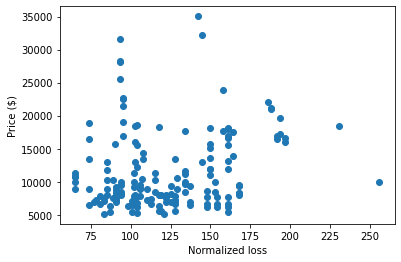

In [70]:
plt.scatter(df.normalized_losses, df.price)
plt.xlabel('Normalized loss')
plt.ylabel('Price ($)')

From the spearman correlation and the scatter plot it seems there is no strong relationship between normalized loss and price. Given that 20% of the data is missing, we will delete the column entirely.

In [71]:
df.drop('normalized_losses', axis=1, inplace=True)

In [78]:
numeric_cols = list(df.describe().columns)
df_numeric = df[numeric_cols]

Lastly we will delete missing records.

In [80]:
df_numeric.dropna(axis=0, inplace=True)
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          195 non-null    int64  
 1   wheel_base         195 non-null    float64
 2   length             195 non-null    float64
 3   width              195 non-null    float64
 4   height             195 non-null    float64
 5   curb_weight        195 non-null    int64  
 6   num_cylinders      195 non-null    int64  
 7   engine_size        195 non-null    int64  
 8   bore               195 non-null    float64
 9   stroke             195 non-null    float64
 10  compression_ratio  195 non-null    float64
 11  horsepower         195 non-null    float64
 12  peak_rpm           195 non-null    float64
 13  city_mpg           195 non-null    int64  
 14  highway_mpg        195 non-null    int64  
 15  price              195 non-null    float64
dtypes: float64(10), int64(6)
m

## KNN modeling